<a href="https://colab.research.google.com/github/ArchieJain120/ML_LAB/blob/main/hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/content/HR_comma_sep.csv")
print(df.head())
print(df.info())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

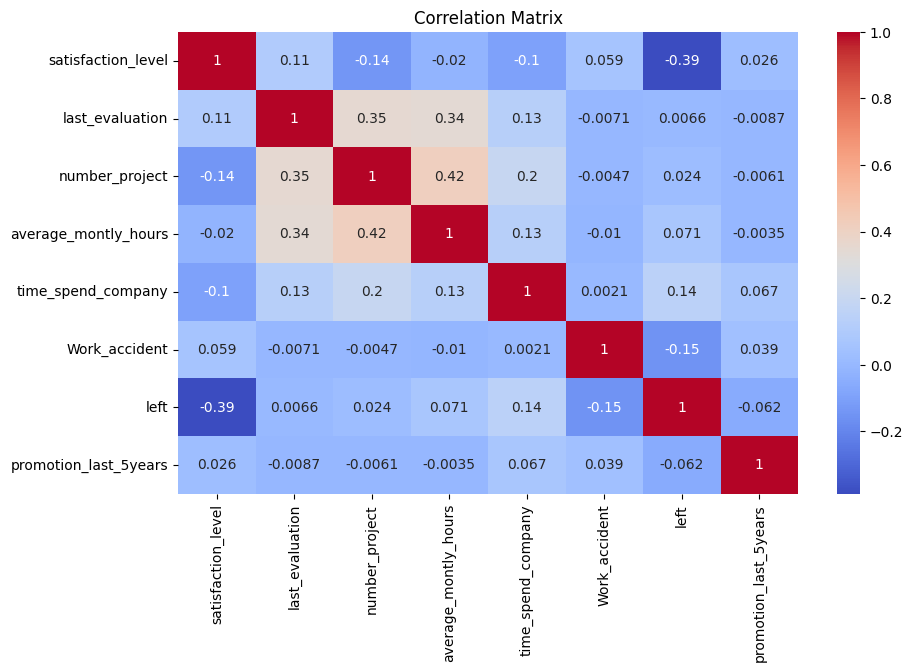

In [4]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()

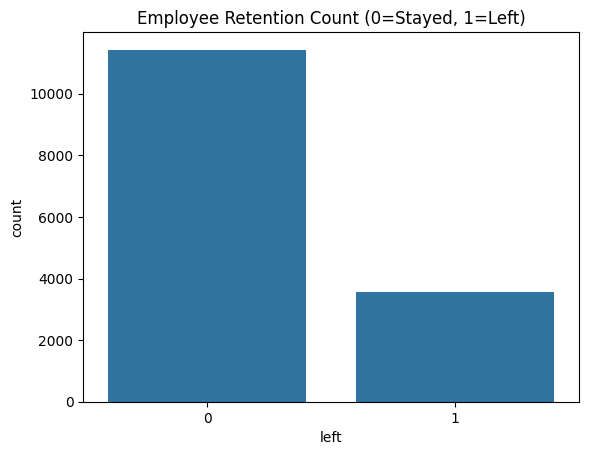

In [5]:
sns.countplot(x='left', data=df)
plt.title("Employee Retention Count (0=Stayed, 1=Left)")
plt.show()

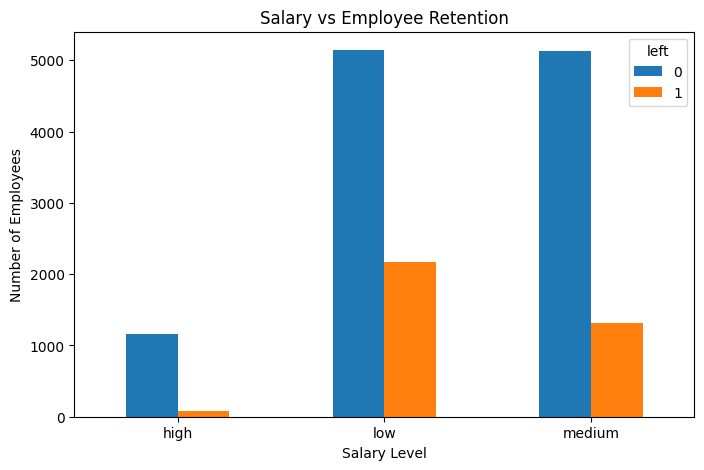

In [6]:
salary_retention = pd.crosstab(df['salary'], df['left'])

salary_retention.plot(kind='bar', figsize=(8,5))
plt.title("Salary vs Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.show()

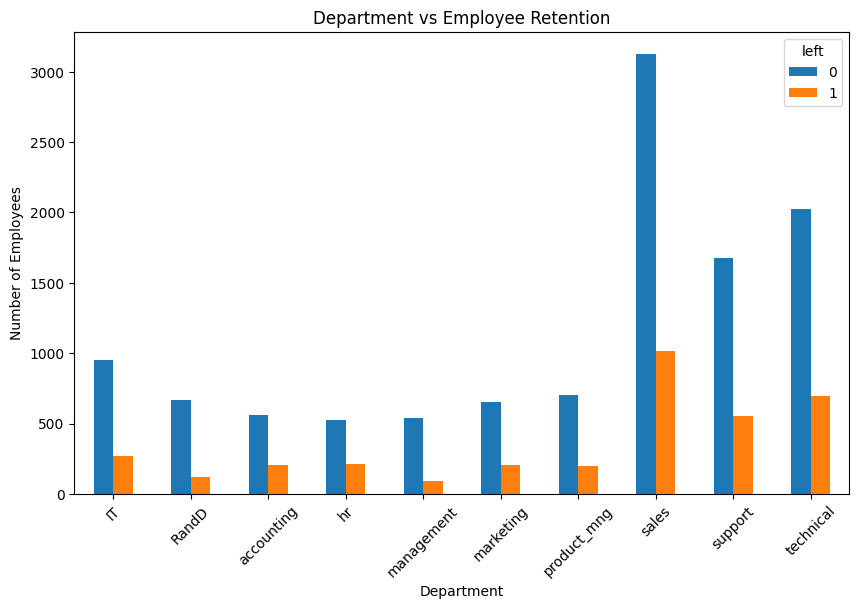

In [7]:
dept_retention = pd.crosstab(df['Department'], df['left'])

dept_retention.plot(kind='bar', figsize=(10,6))
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Select relevant features
df_model = df[['satisfaction_level',
               'average_montly_hours',
               'promotion_last_5years',
               'salary',
               'Department',
               'left']]

# Convert categorical variables into dummy variables
df_model = pd.get_dummies(df_model, columns=['salary', 'Department'], drop_first=True)

print(df_model.head())

   satisfaction_level  average_montly_hours  promotion_last_5years  left  \
0                0.38                   157                      0     1   
1                0.80                   262                      0     1   
2                0.11                   272                      0     1   
3                0.72                   223                      0     1   
4                0.37                   159                      0     1   

   salary_low  salary_medium  Department_RandD  Department_accounting  \
0        True          False             False                  False   
1       False           True             False                  False   
2       False           True             False                  False   
3        True          False             False                  False   
4        True          False             False                  False   

   Department_hr  Department_management  Department_marketing  \
0          False                  False

In [9]:
X = df_model.drop('left', axis=1)
y = df_model['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7677777777777778

Confusion Matrix:
 [[3198  230]
 [ 815  257]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      3428
           1       0.53      0.24      0.33      1072

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.59      4500
weighted avg       0.73      0.77      0.73      4500



In [13]:
from sklearn.metrics import confusion_matrix

# Predict
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3198  230]
 [ 815  257]]


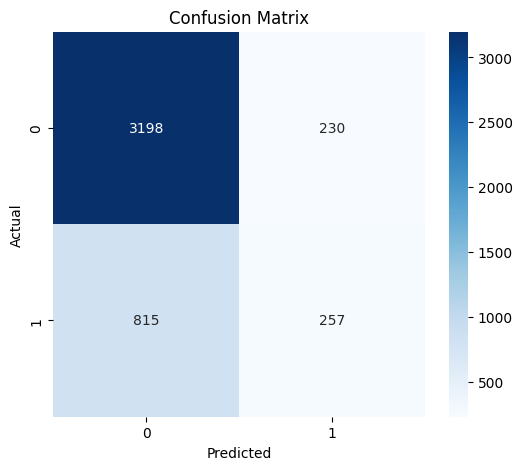

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
corr_df=df.select_dtypes(include=['number']).corr()[['left']].sort_values(by='left',ascending=False)
print(corr_df)

                           left
left                   1.000000
time_spend_company     0.144822
average_montly_hours   0.071287
number_project         0.023787
last_evaluation        0.006567
promotion_last_5years -0.061788
Work_accident         -0.154622
satisfaction_level    -0.388375
